#### Bayesian Classifier
> The XOR Problem

Imports

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from BayesClassifier import BayesClassifier

Set Parameters

In [20]:
nSamples = 500
proportion1 = .5
proportion2 = .5

classKey = 'class'
features = ['x1', 'x2']

center1 = 2.2
center2 = 4.4

c1 = 1
stdDev1 = .1
nSamples1 = round(proportion1 * nSamples)

c2 = 2
stdDev2 = .4
nSamples2 = round(proportion2 * nSamples)

classes = [c1, c2]

#### Generate samples

In [4]:

# Generate samples
nSamplesHalf = round(nSamples1 / 2)
g11 = (center1, center1) + np.random.normal(loc=0, scale=stdDev1, size=(nSamplesHalf, 2))
g12 = [center2, center2] + np.random.normal(loc=0, scale=stdDev1, size=(nSamplesHalf, 2))
g1 = np.concatenate([g11, g12])

nSamplesHalf = round(nSamples2 / 2)
g21 = [center1, center2] + np.random.normal(loc=0, scale=stdDev2, size=(nSamplesHalf, 2))
g22 = [center2, center1] + np.random.normal(loc=0, scale=stdDev2, size=(nSamplesHalf, 2))
g2 = np.concatenate([g21, g22])

samples = np.concatenate([g1, g2])

# Build dataset
colors = np.array([[c1]*nSamples1, [c2]*nSamples2]).flatten()
ds = pd.DataFrame(samples)
ds = pd.concat([ds[0], ds[1], pd.Series(colors)], axis=1)
ds.columns = features + [classKey]

ds1 = ds[ ds[classKey] == c1 ]
ds2 = ds[ ds[classKey] == c2 ]


##### Plot data

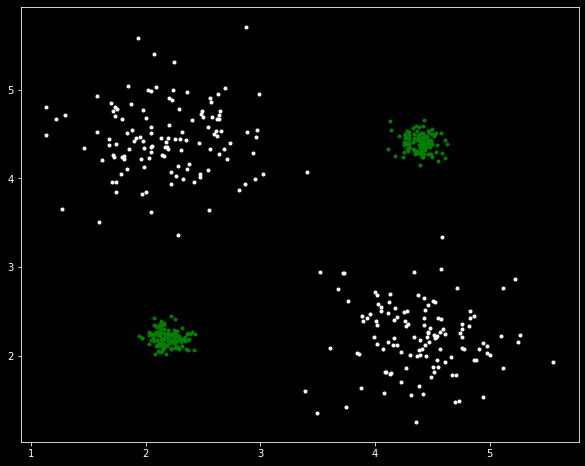

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(ds1.values[:, 0], ds1.values[:, 1], c='green', marker='.')
plt.scatter(ds2.values[:, 0], ds2.values[:, 1], c='white', marker='.')

#### Train

In [6]:
def getXValidationSplit(X: np.array, Y: np.array, trainSize: float) -> tuple:
    nRows = X.shape[0]
    auxSize = round(trainSize * nRows)
    trainIdx = np.random.default_rng().choice(nRows, size=auxSize, replace=False)
    testIdx = list(set(range(nRows)) - set(trainIdx))
    return X[trainIdx], X[testIdx], Y[trainIdx], Y[testIdx]

# Separate data for train X test
testSize = .7

values1 = ds1[features].values
values2 = ds2[features].values

c1TrainX, c1TestX, c1TrainY, c1TestY = getXValidationSplit(ds1[features].values, ds1[classKey].values, testSize)
c2TrainX, c2TestX, c2TrainY, c2TestY = getXValidationSplit(ds2[features].values, ds2[classKey].values, testSize)

trainX = np.vstack( (c1TrainX, c2TrainX) )
trainY = np.append(c1TrainY, c2TrainY)

# Train
classifier = BayesClassifier()
classifier.fit(trainX, trainY)

yHat1 = classifier.predict(c1TestX)
xHat1 = c1TestX[ yHat1 == c1TestY ]
c1Accuracy = np.sum(yHat1 == c1TestY) / len(c1TestY)

yHat2 = classifier.predict(c2TestX)
xHat2 = c2TestX[ yHat2 == c2TestY ]
c2Accuracy = np.sum(yHat2 == c2TestY) / len(c2TestY)

print(c1Accuracy, c2Accuracy)

1.0 1.0


#### Plot Result

/tmp/ipykernel_50765/385497950.py:10: UserWarning: No contour levels were found within the data range.
  axis.contour(meshX, meshY, sepMargin, colors='lightgreen', levels=[-1, 0, 1], alpha=.4)


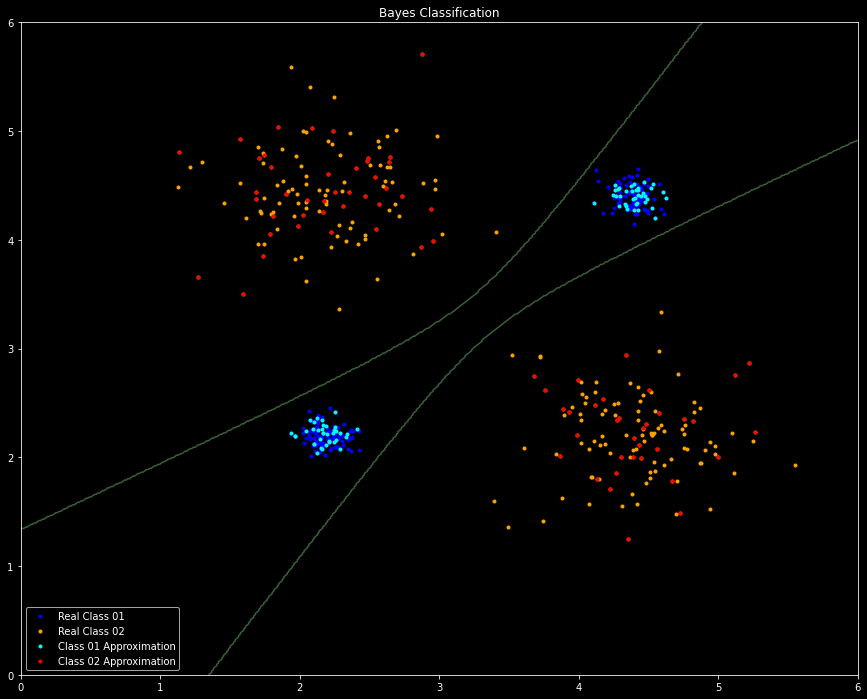

In [7]:
# Build Separation Margin
meshAux = np.linspace(start=0, stop=6, num=500)
meshX, meshY = np.meshgrid(meshAux, meshAux)
sepMargin = classifier.predict(np.c_[meshX.ravel(), meshY.ravel()])
sepMargin = sepMargin.reshape(meshX.shape)

# Plot Separation Margin
figure = plt.figure(figsize=(15, 12))
axis = plt.subplot2grid((1, 1), (0, 0), fig=figure)
axis.contour(meshX, meshY, sepMargin, colors='lightgreen', levels=[-1, 0, 1], alpha=.4)

# Plot points
plt.scatter(ds1.values[:, 0], ds1.values[:, 1], c='blue', marker='.')
plt.scatter(ds2.values[:, 0], ds2.values[:, 1], c='orange', marker='.')

plt.scatter(xHat1[:, 0], xHat1[:, 1], c='cyan', marker='.')
plt.scatter(xHat2[:, 0], xHat2[:, 1], c='red', marker='.')

plt.title('Bayes Classification')
plt.legend(['Real Class 01', 'Real Class 02', 'Class 01 Approximation', 'Class 02 Approximation'], loc='lower left')